In [1]:
import semicon

# load parameters as dataframe

In [2]:
semicon.parameters.load_params('winkler')

,E_0,Delta_0,P,m_c,g_c,gamma_1,gamma_2,gamma_3,kappa,q
InAs,0.418,0.380,0.9197,0.0229,-14.900,20.40,8.30,9.10,7.60,0.39
AlSb,2.384,0.673,0.8463,0.1200,0.843,4.15,1.01,1.71,0.31,0.07
InSb,0.237,0.810,0.9641,0.0139,-51.560,37.10,16.50,17.70,15.60,0.39


In [3]:
semicon.parameters.load_params('lawaetz')

,E_0,Delta_0,P,m_c,g_c,gamma_1,gamma_2,gamma_3,kappa,q
AlSb,2.30,0.75,0.8441,0.180,0.52,4.15,1.01,1.75,0.31,0.07
GaSb,0.81,0.77,0.9238,0.045,-7.12,11.80,4.03,5.26,3.18,0.13
InAs,0.42,0.38,0.9197,0.023,-14.80,19.67,8.37,9.29,7.68,0.04


# bulk parameters

In [4]:
semicon.parameters.bulk(
    bank='lawaetz',
    material='InAs',
    new_gamma_0=1,
)

{'Delta_0': 0.38,
 'E_0': 0.41999999999999998,
 'E_v': 0.0,
 'P': 0.89866827778003733,
 'g_c': 1.1819199311235451,
 'gamma_0': 1,
 'gamma_1': 2.8469263882910063,
 'gamma_2': -0.041536805854498482,
 'gamma_3': 0.87846319414550145,
 'kappa': -0.73153680585449798,
 'q': 0.040000000000000001}

# 2DEG parameters

In [5]:
grid_spacing = 0.5
widths = [5, 12.5, 5, 5]

two_deg_params, walls = semicon.parameters.two_deg(
    bank='lawaetz',
    materials=['AlSb', 'InAs', 'GaSb', 'AlSb'],
    widths=widths,
    valence_band_offsets=[.18, .0, .56, .18],
    grid_spacing=0.5,
    new_gamma_0=0.5,
    extra_constants={'hbar': 1, 'e': 1},
#     bands=bands,
)

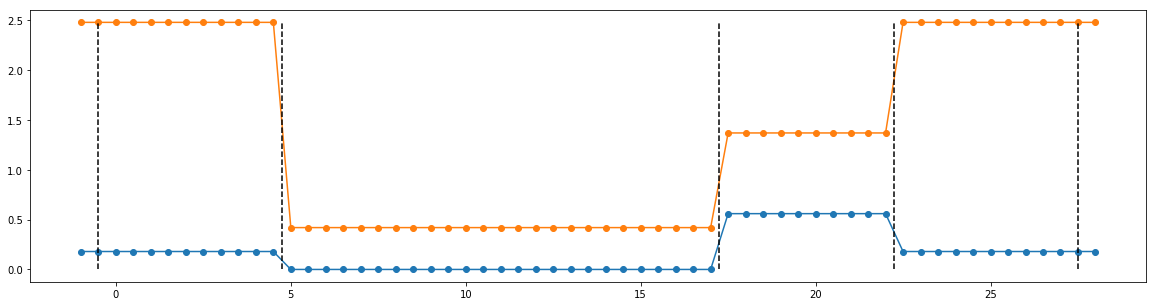

In [6]:
import numpy as np

xpos = np.arange(- 2 * grid_spacing, sum(widths) + 2 * grid_spacing, 0.5)
semicon.parameters.plot_2deg_bandedges(two_deg_params, xpos, walls)